In [1]:
import pandas as pd

import sys
sys.path.append("..")

import multi_prophet

## Data set

In [2]:
df = pd.read_csv("../data/retail_sales.csv")
df["y1"] = df["y"].apply(lambda x: x + 10 * x / 100)
df.head()

,ds,y,y1
0,1992-01-01,146376,161013.6
1,1992-02-01,147079,161786.9
2,1992-03-01,159336,175269.6
3,1992-04-01,163669,180035.9
4,1992-05-01,170068,187074.8


## Define the model with same configuration, fit and predict

In [3]:
m = multi_prophet.MultiProphet(columns=["y", "y1"], growth="linear")
m.fit(df)

future_df = m.make_future_dataframe(periods=10)
forecast = m.predict(future_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future_df.tail()

,ds
298,2016-05-07
299,2016-05-08
300,2016-05-09
301,2016-05-10
302,2016-05-11


## Plot results

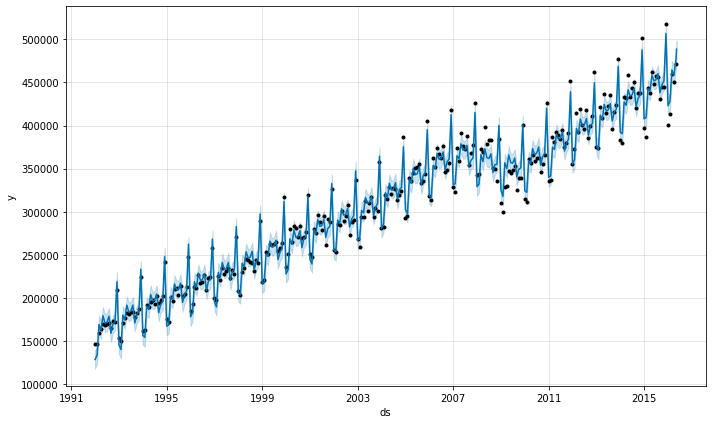

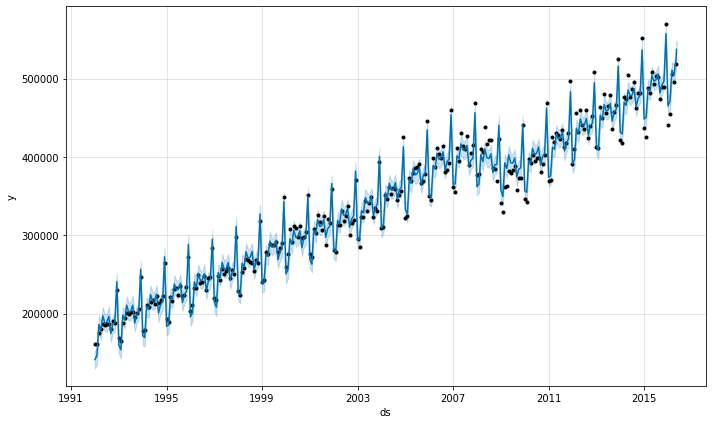

In [5]:
plots = m.plot(forecast)

## How the predictions look

In [6]:
forecast["y"].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,162790.626940,118017.769732,138913.631657,162790.626940,162790.626940,-34274.703082,-34274.703082,-34274.703082,-34274.703082,-34274.703082,-34274.703082,0.0,0.0,0.0,128515.923858
1,1992-02-01,163841.488285,123393.160310,143366.109598,163841.488285,163841.488285,-30581.659299,-30581.659299,-30581.659299,-30581.659299,-30581.659299,-30581.659299,0.0,0.0,0.0,133259.828986
2,1992-03-01,164824.552125,159040.856434,179357.118611,164824.552125,164824.552125,4373.025519,4373.025519,4373.025519,4373.025519,4373.025519,4373.025519,0.0,0.0,0.0,169197.577644
3,1992-04-01,165875.413470,152559.737093,173015.447872,165875.413470,165875.413470,-3162.092879,-3162.092879,-3162.092879,-3162.092879,-3162.092879,-3162.092879,0.0,0.0,0.0,162713.320592
4,1992-05-01,166892.376063,169188.694068,189475.647577,166892.376063,166892.376063,12400.822879,12400.822879,12400.822879,12400.822879,12400.822879,12400.822879,0.0,0.0,0.0,179293.198942


In [7]:
forecast["y1"].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,179122.110172,129983.804067,152840.291933,179122.110172,179122.110172,-37659.232706,-37659.232706,-37659.232706,-37659.232706,-37659.232706,-37659.232706,0.0,0.0,0.0,141462.877466
1,1992-02-01,180277.978504,135192.505986,156808.213006,180277.978504,180277.978504,-33585.385318,-33585.385318,-33585.385318,-33585.385318,-33585.385318,-33585.385318,0.0,0.0,0.0,146692.593186
2,1992-03-01,181359.274685,174751.547582,197449.882338,181359.274685,181359.274685,4852.500434,4852.500434,4852.500434,4852.500434,4852.500434,4852.500434,0.0,0.0,0.0,186211.775119
3,1992-04-01,182515.143017,166594.442072,190473.795130,182515.143017,182515.143017,-3492.151913,-3492.151913,-3492.151913,-3492.151913,-3492.151913,-3492.151913,0.0,0.0,0.0,179022.991104
4,1992-05-01,183633.725274,186098.583613,208559.138783,183633.725274,183633.725274,13579.678844,13579.678844,13579.678844,13579.678844,13579.678844,13579.678844,0.0,0.0,0.0,197213.404118


## Define the model with different configuration, fit and predict

In [8]:
config = {
    "y": {"weekly_seasonality": True, "seasonality_mode": "additive"},
    "y1": {"yearly_seasonality": True, "seasonality_mode": "multiplicative"}
}
m = multi_prophet.MultiProphet(columns=["y", "y1"], config=config)
m.fit(df)

future_df = m.make_future_dataframe(periods=10)
forecast = m.predict(future_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Plot results

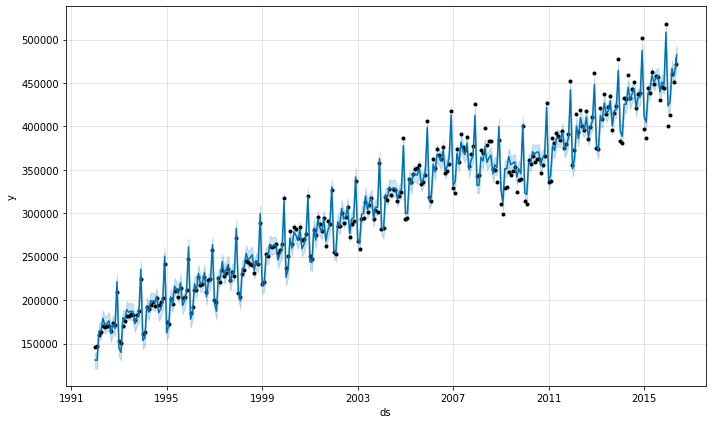

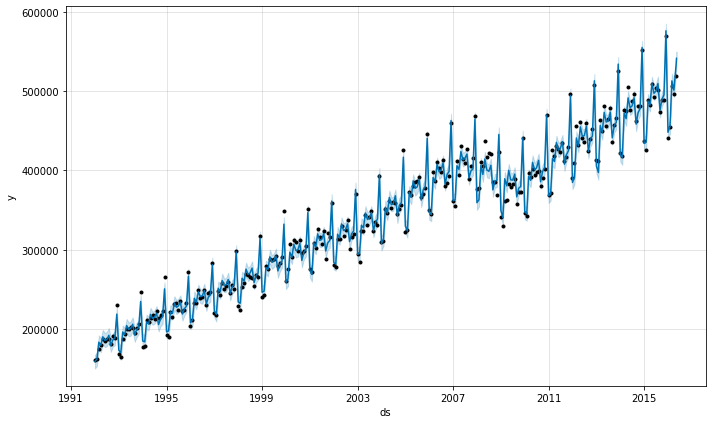

In [9]:
plots = m.plot(forecast)